## This is the default cleaned data that is input to the Benchmark ML model : Random Forest + ver2 clean data

In [1]:
import pandas as pd
import numpy as np

In [5]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v2.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [6]:
y_2house = np.load('y_2house.npy')

## preparing the data input to ML 

In [18]:
# load the saved csv
# !head -10 /wgdisk/ho0331/ek79/Tien_DS/X_2house.csv
# X_2house = pd.read_csv('/wgdisk/ho0331/ek79/Tien_DS/X_2house.csv')

In [7]:
X_2house.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2,Bsmt Bath_2,Total Bath_2,Porch SF_2,Total House SF_2,Sold Time_2
Order,,,,,,,,,,,,,,,,,,,,,
0,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,6.0,2010.0,0.0,3.0,0.000000,1.0,0.041096,2920.0,54.0
1,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,12500.0,6.0,2010.0,0.0,3.0,0.000000,1.5,0.008086,4452.0,54.0
2,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,4.0,2010.0,0.0,3.0,0.285714,3.5,0.000000,6330.0,52.0
3,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,3.0,2010.0,0.0,3.0,0.000000,2.5,0.009031,3765.0,51.0
4,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,6.0,2010.0,0.0,3.0,0.000000,2.5,0.009259,3888.0,54.0


In [9]:
print('dimension of X_2house:',X_2house.shape)
print('dimension of y_2House:',y_2house.shape)
print(X_2house.columns)
print(len(X_2house.columns))

dimension of X_2house: (4290985, 168)
dimension of y_2House: (4290985,)
Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Misc Val_2', 'Mo Sold_2', 'Yr Sold_2', 'Sale Type_2',
       'Sale Condition_2', 'Bsmt Bath_2', 'Total Bath_2', 'Porch SF_2',
       'Total House SF_2', 'Sold Time_2'],
      dtype='object', length=168)
168


## Now use the 2nd different way prepared data

### policy: combine several attributes and create new (e.g. the Square-footage of the whole house, the total rooms....etc)

### Set up the train-test split in sklearn

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 168)
(2145492,)
(2145493, 168)
(2145493,)


In [12]:
print(type(X_train))
X_train.head(2)

<class 'pandas.core.frame.DataFrame'>


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2,Bsmt Bath_2,Total Bath_2,Porch SF_2,Total House SF_2,Sold Time_2
Order,,,,,,,,,,,,,,,,,,,,,
221331,60.0,4.0,70.0,11218.0,1.0,1.0,3.0,3.0,4.0,4.0,...,0.0,8.0,2007.0,0.0,3.0,0.333333,3.0,0.032097,4393.0,20.0
4201490,160.0,3.0,30.0,3180.0,1.0,2.0,3.0,3.0,4.0,4.0,...,0.0,6.0,2006.0,0.0,3.0,0.000000,1.0,0.000000,2999.0,6.0


In [13]:
print(y_train[0:2])

[ -3350.  34000.]


## Setup a RF(Random Forest) model

In [14]:
from sklearn.ensemble import RandomForestRegressor
RF_model02 = RandomForestRegressor(random_state=12)

In [15]:
RF_model02.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [16]:
pred_train_RF = RF_model02.predict(X_train)
print('training score of RandomForest:',RF_model02.score(X_train,pred_train_RF))
pred_test_RF = RF_model02.predict(X_test)
print('test score of RandomForest:',RF_model02.score(X_test,pred_test_RF))

training score of RandomForest: 1.0
test score of RandomForest: 1.0


In [17]:
# access several benchmark RMSE for reference:
from sklearn import metrics
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_RF))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_RF))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_RF))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_RF))

MSE score(training): 23336202.7745
MAE score(training): 3099.82624842
MSE score: 112713283.59
MAE score: 7127.69311588


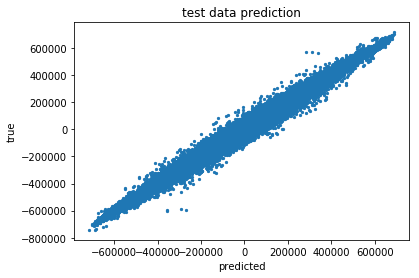

In [19]:
## Plotting the predicted price difference and the true price difference
import matplotlib.pyplot as plt
plt.scatter(pred_test_RF,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

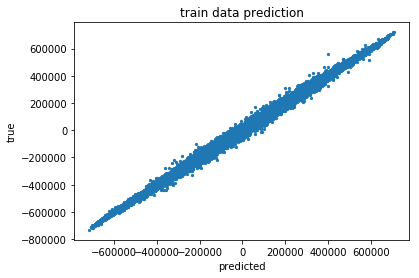

In [20]:
plt.scatter(pred_train_RF,y_train, s=5)
plt.title('train data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

MS SubClass 0.000429812024534
MS Zoning 0.000650526667307
Lot Frontage 0.00191344906367
Lot Area 0.00512265283912
Street 3.83259461925e-06
Alley 6.30428667632e-05
Lot Shape 0.000221369976126
Land Contour 0.000821236252623
Utilities 2.02918347805e-07
Lot Config 0.000430906587022
Land Slope 6.84297243299e-05
Neighborhood 0.000891147316223
Condition 1 0.00020524715273
Condition 2 4.22935546853e-06
Bldg Type 5.30159705214e-05
House Style 8.96951437579e-05
Overall Qual 0.284978929434
Overall Cond 0.00138715675336
Year Built 0.0145052101368
Year Remod/Add 0.00535352420786
Roof Style 0.000278086687178
Roof Matl 3.61552260957e-05
Exterior 1st 0.000479140431022
Exterior 2nd 0.000602383612907
Mas Vnr Type 0.000201865810799
Mas Vnr Area 0.00121857314986
Exter Qual 0.000315315894886
Exter Cond 0.000150783648053
Foundation 0.000253320320067
Bsmt Qual 0.000342408407162
Bsmt Cond 0.000283521218107
Bsmt Exposure 0.000867207835733
BsmtFin Type 1 0.000775717132106
BsmtFin SF 1 0.00247303554505
BsmtFin T

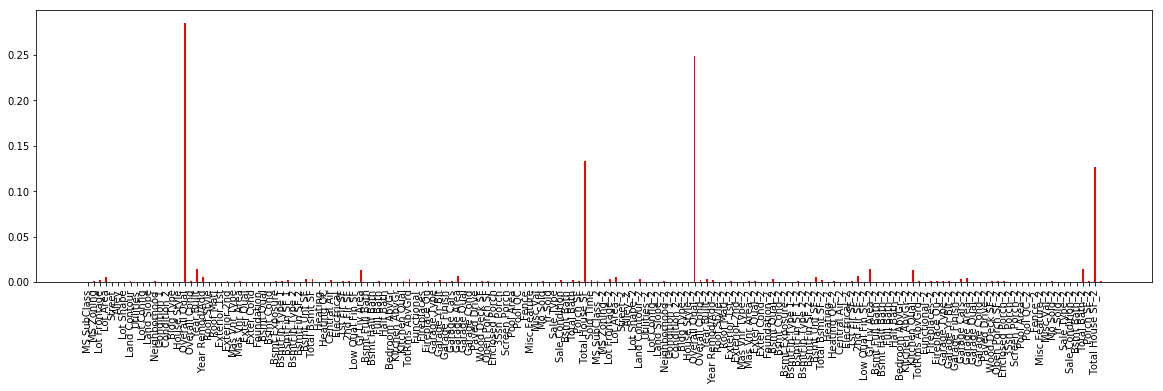

In [22]:
# Take a look at feature importance
f_importance = pd.DataFrame({'feature':X_2house.columns, 'importance':RF_model02.feature_importances_})
#plot histogram
x_tick_label=[None]*168
hist_val=np.zeros(168)
for i in range(0,168):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    print(x_tick_label[i],hist_val[i])
    
index = np.arange(168)+1
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, 168, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

## Run a cross-validation to know the RF_model02 performance.

In [28]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)

In [ ]:
k_fold.get_n_splits(X_train)
scores = np.sqrt(-1*cross_val_score(RF_model02, X_train, y_train, cv=20,verbose=10,scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

[CV]  ................................................................
[CV] ...................... , score=-115414676.16106942, total=28.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 28.2min remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-118767338.51408249, total=27.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 55.8min remaining:    0.0s


[CV] ...................... , score=-118191236.70367388, total=25.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 81.7min remaining:    0.0s


[CV] ...................... , score=-116778915.86337687, total=25.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 106.7min remaining:    0.0s


[CV] ...................... , score=-115720593.89101017, total=24.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 131.3min remaining:    0.0s


[CV] ...................... , score=-115634649.50730078, total=22.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 154.1min remaining:    0.0s


[CV] ....................... , score=-113938478.7419592, total=21.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 175.9min remaining:    0.0s


[CV] ...................... , score=-115218043.07122408, total=21.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 197.5min remaining:    0.0s


[CV] ...................... , score=-115517876.18313321, total=21.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 219.3min remaining:    0.0s


[CV] ...................... , score=-115713663.03527823, total=21.6min
[CV]  ................................................................
[CV] ...................... , score=-113363103.30314304, total=21.7min
[CV]  ................................................................
[CV] ...................... , score=-113181144.94672844, total=21.7min
[CV]  ................................................................
[CV] ...................... , score=-114778189.54120211, total=21.4min
[CV]  ................................................................
[CV] ...................... , score=-115317853.89778566, total=20.7min
[CV]  ................................................................


In [32]:
print('Mean Cross-validation scores of MSE:',np.mean(scores))

Mean Cross-validation scores of MSE: 53263.1307391


In [38]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(46188.077511158765, 72043.115563603205), mean=53263.130739140171, variance=56831459.222560018, skewness=1.267815975506349, kurtosis=0.30801714300650707)